In [14]:
import pandas as pd
import numpy as np
td_2011 = pd.read_csv('/Users/cd/Documents/Code Academy Berlin/Project 3/2011+trip+data/2011-capitalbikeshare-tripdata.csv')
td_2011_copy = td_2011.copy()  

In [15]:
td_2011.head()


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [16]:
#hunting nans
nan_indices = td_2011.isna()
print(nan_indices.any()) 

Duration                False
Start date              False
End date                False
Start station number    False
Start station           False
End station number      False
End station             False
Bike number             False
Member type             False
dtype: bool


In [17]:
# Count NaN values of whole DataFrame. nothing is NaN
nan_count=td_2011.isna().sum().sum()
print(nan_count)

0


In [18]:
#hunting duplicates, none found
duplicateRows = td_2011[td_2011.duplicated()]
print(duplicateRows) 

Empty DataFrame
Columns: [Duration, Start date, End date, Start station number, Start station, End station number, End station, Bike number, Member type]
Index: []


In [19]:
#The attribute dteday would require type conversion from object (or string type) to timestamp. 
#That is, 'dteday' should be a 'datetime' object.
td_2011['Start date'] = pd.to_datetime(td_2011['Start date'])
td_2011['End date'] = pd.to_datetime(td_2011['End date'])
td_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Duration              1226767 non-null  int64         
 1   Start date            1226767 non-null  datetime64[ns]
 2   End date              1226767 non-null  datetime64[ns]
 3   Start station number  1226767 non-null  int64         
 4   Start station         1226767 non-null  object        
 5   End station number    1226767 non-null  int64         
 6   End station           1226767 non-null  object        
 7   Bike number           1226767 non-null  object        
 8   Member type           1226767 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 84.2+ MB


In [20]:
td_2011['Duration_sec'] = td_2011['Duration']
td_2011.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233


In [21]:
td_2011[["Start station number", "End station number"]] = td_2011[["Start station number", "End station number"]].astype("category")

In [22]:
print(td_2011[["Start station number", "End station number", 'Duration', 'Bike number']].dtypes)

Start station number    category
End station number      category
Duration                   int64
Bike number               object
dtype: object


In [23]:
td_2011[["Bike number"]] = td_2011[["Bike number"]].astype("str")
td_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Duration              1226767 non-null  int64         
 1   Start date            1226767 non-null  datetime64[ns]
 2   End date              1226767 non-null  datetime64[ns]
 3   Start station number  1226767 non-null  category      
 4   Start station         1226767 non-null  object        
 5   End station number    1226767 non-null  category      
 6   End station           1226767 non-null  object        
 7   Bike number           1226767 non-null  object        
 8   Member type           1226767 non-null  object        
 9   Duration_sec          1226767 non-null  int64         
dtypes: category(2), datetime64[ns](2), int64(2), object(4)
memory usage: 79.6+ MB


In [24]:
def add_underscores(td_2011):
    td_2011.columns = td_2011.columns.str.replace(' ', '_')
    return td_2011
td_2011 = add_underscores(td_2011)


In [25]:
td_2011.columns = td_2011.columns.str.lower()
td_2011

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,3548
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,562
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,434
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,233
...,...,...,...,...,...,...,...,...,...,...
1226762,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member,300
1226763,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member,387
1226764,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member,261
1226765,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member,2060


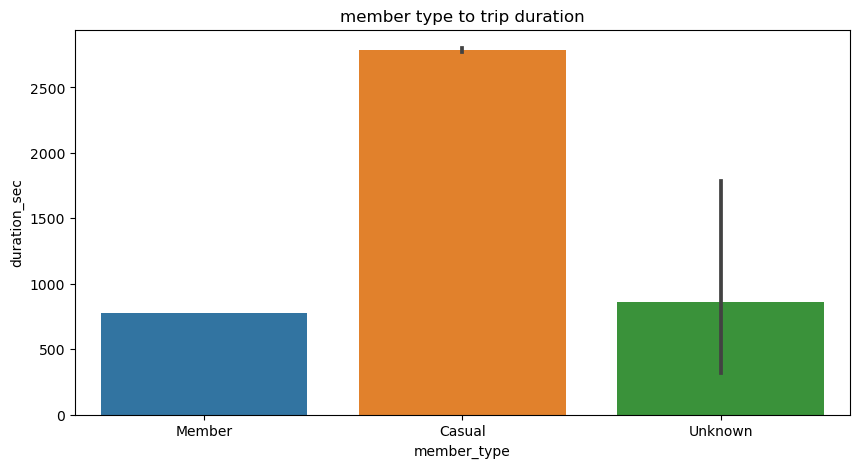

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=td_2011, x='member_type', y='duration_sec')
ax.set(title="member type to trip duration")
plt.show()

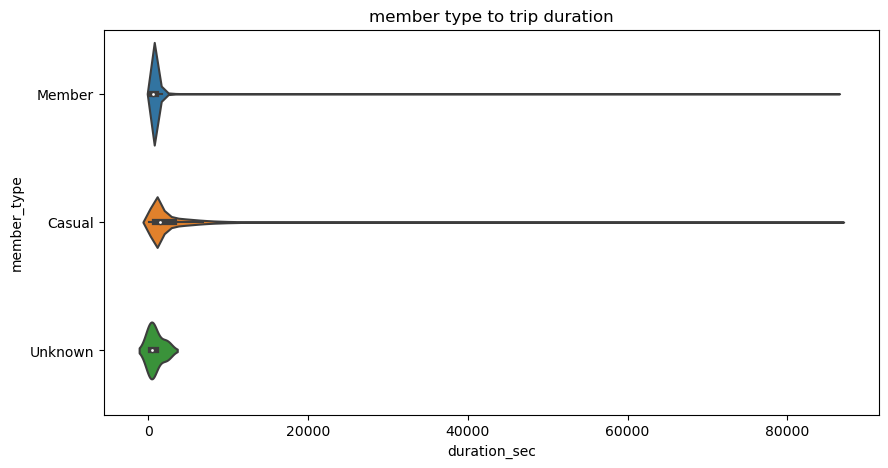

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,5))
bike_no = td_2011[td_2011['bike_number']=='W00675']
sns.violinplot(data=td_2011, x='duration_sec', y='member_type')
ax.set(title="member type to trip duration")
plt.show()

In [28]:
bike_no = td_2011[td_2011['bike_number']=='W00675']
bike_no

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type,duration_sec
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,346
45,451,2011-01-01 01:46:59,2011-01-01 01:54:31,31101,14th & V St NW,31207,Georgia Ave and Fairmont St NW,W00675,Member,451
183,524,2011-01-01 11:32:35,2011-01-01 11:41:20,31207,Georgia Ave and Fairmont St NW,31104,Adams Mill & Columbia Rd NW,W00675,Member,524
368,634,2011-01-01 13:41:17,2011-01-01 13:51:51,31104,Adams Mill & Columbia Rd NW,31207,Georgia Ave and Fairmont St NW,W00675,Member,634
1029,387,2011-01-02 09:40:24,2011-01-02 09:46:52,31207,Georgia Ave and Fairmont St NW,31101,14th & V St NW,W00675,Member,387
...,...,...,...,...,...,...,...,...,...,...
1212742,641,2011-12-24 11:25:28,2011-12-24 11:36:10,31230,Metro Center / 12th & G St NW,31203,14th & Rhode Island Ave NW,W00675,Member,641
1214377,2857,2011-12-26 10:22:00,2011-12-26 11:09:38,31203,14th & Rhode Island Ave NW,31620,5th & F St NW,W00675,Casual,2857
1215511,572,2011-12-26 23:54:48,2011-12-27 00:04:20,31620,5th & F St NW,31108,4th & M St SW,W00675,Member,572
1215636,897,2011-12-27 07:43:22,2011-12-27 07:58:19,31108,4th & M St SW,31222,New York Ave & 15th St NW,W00675,Member,897


In [29]:
td_2011['start_station_number'].value_counts()

31200    49093
31201    32884
31623    32058
31104    29964
31214    28160
         ...  
31806        4
31704        1
31708        1
31052        1
31266        1
Name: start_station_number, Length: 144, dtype: int64

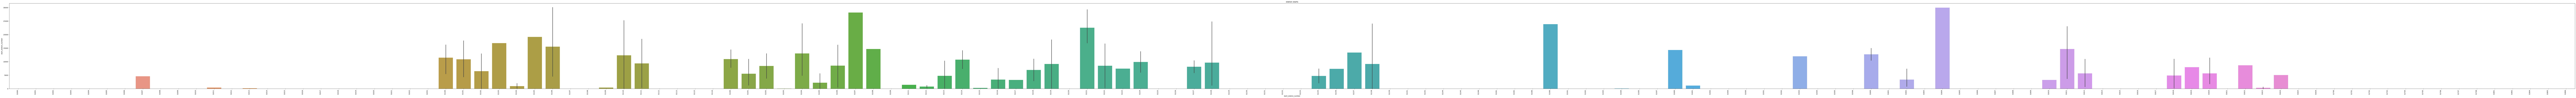

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(figsize=(300,10))
#ssn_valc = td_2011['start_station_number'].value_counts()
#plot_order = td_2011.groupby('start_station_number')[ssn_valc].sum().sort_values(ascending=False).index.values
sns.barplot(data=td_2011, x='start_station_number', y=td_2011['start_station_number'].value_counts())
ax.set(title="station starts")
ax.set_xticklabels(ax.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
plt.show()



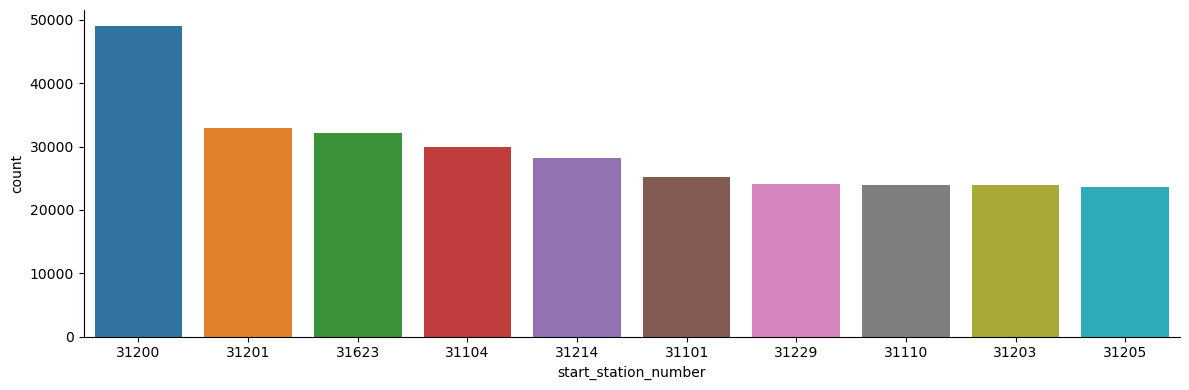

In [43]:
#top 10 starting stations

sns.catplot(data=td_2011, kind='count', x='start_station_number', height=4, aspect=3,  order=pd.value_counts(td_2011['start_station_number']).iloc[:10].index)
#order= td_2011['start_station_number'].value_counts().index,

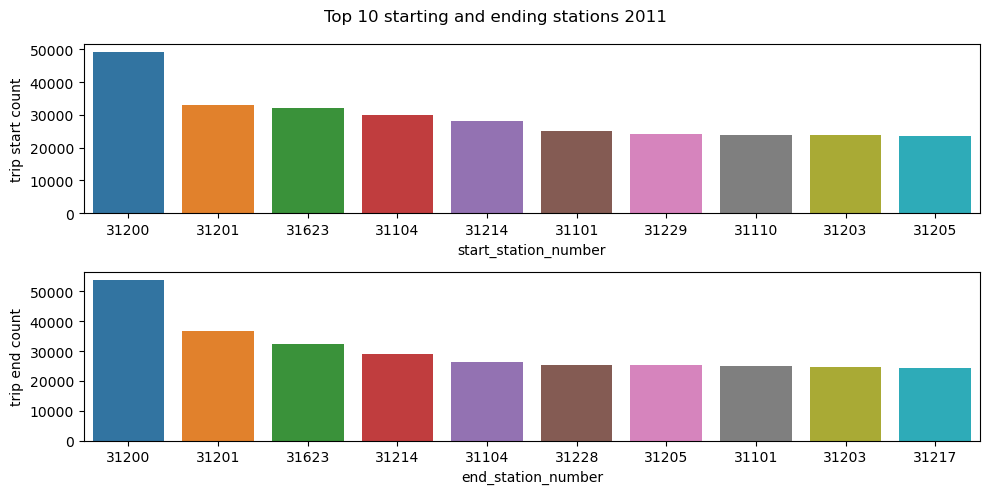

In [41]:
#top 10 starting and ending stations 2011: focus on rebalancing 
#costs start here:
#https://www.sciencedirect.com/science/article/abs/pii/S0377221718302030


## notice 31229 and 31228. 31229 is a top 10 starting station, but not ending. 31228 is a top 10 ending station, but not starting. 


# Clearly, the repositioning of bikes from stations too full to stations too empty is a huge operational overhead. 
#In fact, for Vélib system in Paris, the average cost of a single repositioning for a single bike is $3 (DeMaio, 2009). 
#According to a report by New York City Department of City Planning (2009) based on different case studies, 
#the total capital cost for a bike sharing system varies from $3000/bike to $4400/bike in different cities. 
#When averaged across programs, the yearly operating cost for a bike share program is around $1600/bike.

fig, ax = plt.subplots(2,1, figsize=(10,5))

sns.countplot(data=td_2011,  x='start_station_number', order=pd.value_counts(td_2011['start_station_number']).iloc[:10].index, ax=ax[0]).set(ylabel='trip start count')
sns.countplot(data=td_2011,  x='end_station_number', order=pd.value_counts(td_2011['end_station_number']).iloc[:10].index, ax=ax[1]).set(ylabel='trip end count')
fig.suptitle("Top 10 starting and ending stations 2011")
plt.tight_layout()
plt.show()


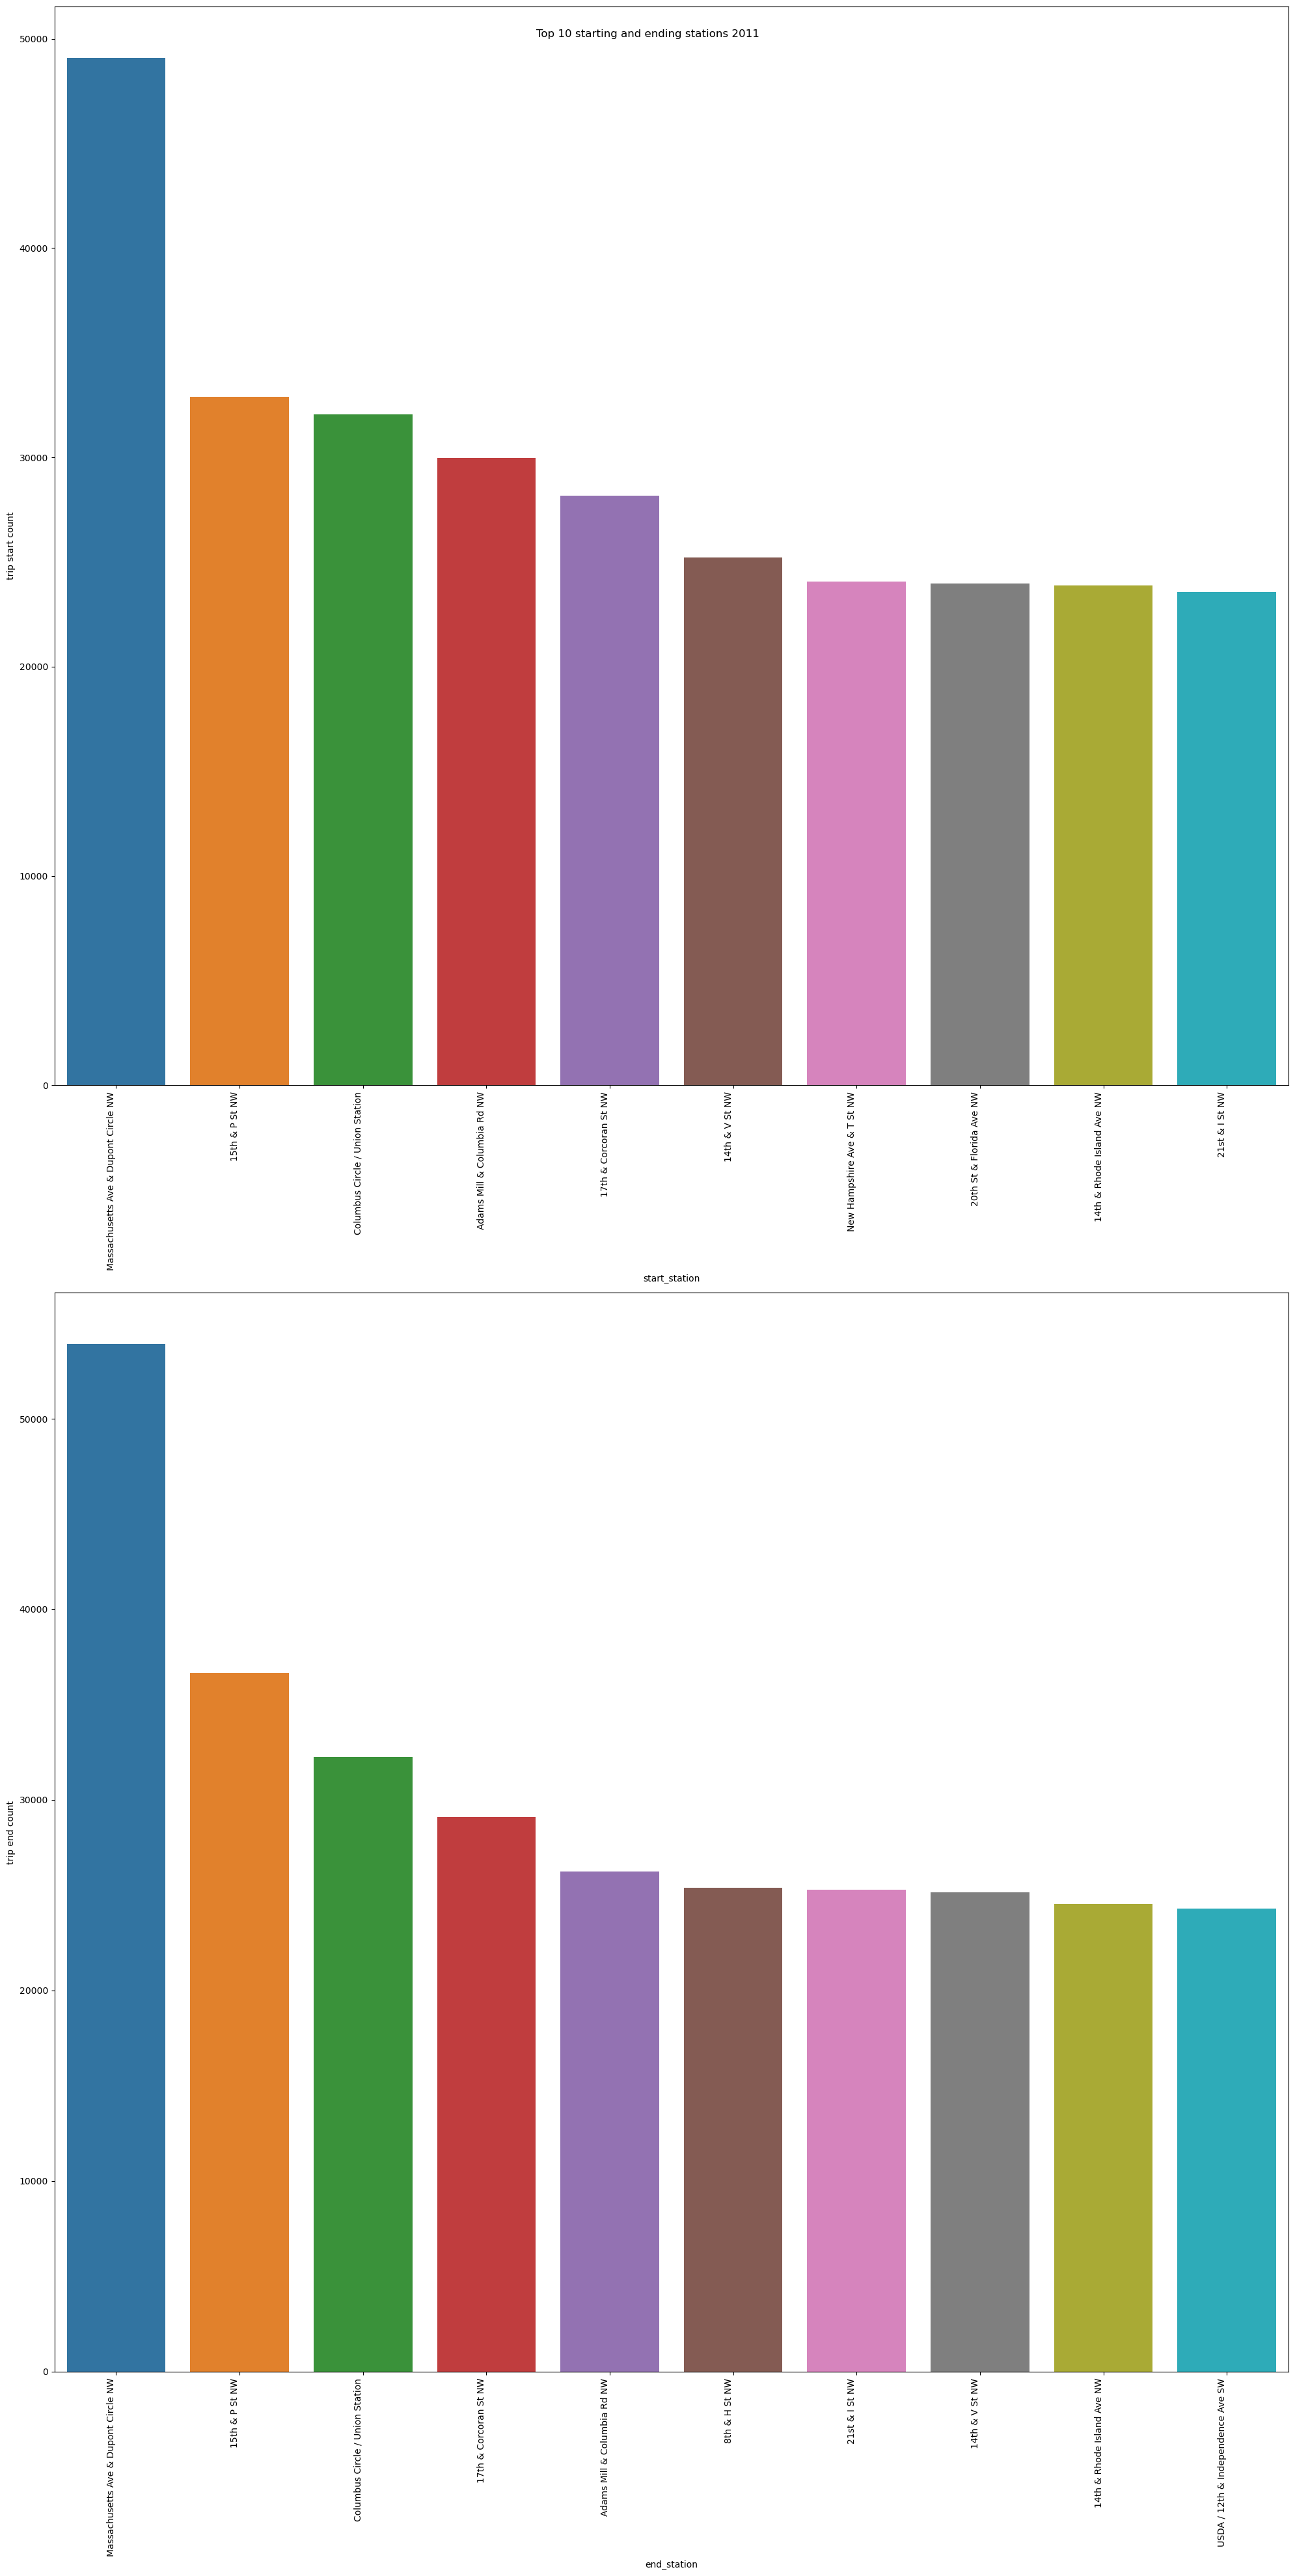

In [50]:
fig, ax = plt.subplots(2,1, figsize=(20,40))

sns.countplot(data=td_2011,  x='start_station', order=pd.value_counts(td_2011['start_station']).iloc[:10].index, ax=ax[0]).set(ylabel='trip start count')
sns.countplot(data=td_2011,  x='end_station', order=pd.value_counts(td_2011['end_station']).iloc[:10].index, ax=ax[1]).set(ylabel='trip end count')
fig.suptitle("Top 10 starting and ending stations 2011")
ax[0].set_xticklabels(ax[0].get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

plt.tight_layout()
plt.show()

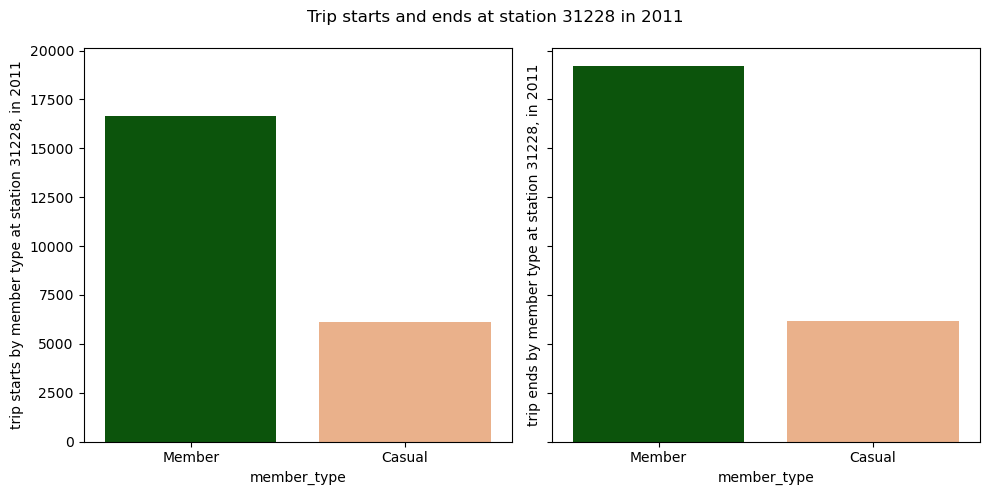

In [54]:
#station 31228 in 2011
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,5))

sns.countplot(data=td_2011[td_2011['start_station_number'] == 31228], x='member_type', ax=ax[0], palette=['#006000',"#FAAE7B"]).set(ylabel='trip starts by member type at station 31228, in 2011')

sns.countplot(data=td_2011[td_2011['end_station_number'] == 31228], x='member_type', ax=ax[1], palette=['#006000',"#FAAE7B"]).set(ylabel='trip ends by member type at station 31228, in 2011')
fig.suptitle("Trip starts and ends at station 31228 in 2011")
plt.tight_layout()

plt.show()


now plot the top 10 stations by user type
casuals use which 10 stations the most?
members use wich 10 stations the most?
top10 where usertype == casual or member